<a href="https://colab.research.google.com/github/lwallac2/Bank-Marketing/blob/main/Lab3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import math
from math import acos, degrees
from scipy import spatial
from scipy.stats import chisquare
from scipy.stats import chi2_contingency
from sklearn.metrics.pairwise import cosine_similarity


#Reading in the data as adult dataframe
df = pd.read_csv("https://raw.githubusercontent.com/lwallac2/Bank-Marketing/main/bank-additional.csv", sep=';')

#Verifying that we can see the data
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,487,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
1,39,services,single,high.school,no,no,no,telephone,may,fri,346,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,227,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,17,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,58,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no


In [5]:
df1 = df
df1.day_of_week.replace('mon',1, inplace=True)
df1.day_of_week.replace('tue',2, inplace=True)
df1.day_of_week.replace('wed',3, inplace=True)
df1.day_of_week.replace('thu',4, inplace=True)
df1.day_of_week.replace('fri',5, inplace=True)

df1.job.replace('admin.',1, inplace=True)
df1.job.replace('blue-collar',2, inplace=True)
df1.job.replace('entrepreneur',3, inplace=True)
df1.job.replace('housemaid',4, inplace=True)
df1.job.replace('management',5, inplace=True)
df1.job.replace('retired',6, inplace=True)
df1.job.replace('self-employed',7, inplace=True)
df1.job.replace('services',8, inplace=True)
df1.job.replace('student',9, inplace=True)
df1.job.replace('technician',10, inplace=True)
df1.job.replace('unemployed',11, inplace=True)
df1.job.replace('unknown',12, inplace=True)

df1.marital.replace('divorced',1, inplace=True)
df1.marital.replace('married',2, inplace=True)
df1.marital.replace('single',3, inplace=True)
df1.marital.replace('unknown',4, inplace=True)


df1.education.replace('basic.4y',1, inplace=True)
df1.education.replace('basic.6y',2, inplace=True)
df1.education.replace('basic.9y',3, inplace=True)
df1.education.replace('high.school',4, inplace=True)
df1.education.replace('illiterate',5, inplace=True)
df1.education.replace('professional.course',6, inplace=True)
df1.education.replace('university.degree',7, inplace=True)
df1.education.replace('unknown',8, inplace=True)

df1.default.replace('no',0, inplace=True)
df1.default.replace('yes',1, inplace=True)
df1.default.replace('unknown',2, inplace=True)

df1.housing.replace('no',0, inplace=True)
df1.housing.replace('yes',1, inplace=True)
df1.housing.replace('unknown',2, inplace=True)

df1.loan.replace('no',0, inplace=True)
df1.loan.replace('yes',1, inplace=True)
df1.loan.replace('unknown',2, inplace=True)

df1.contact.replace('cellular',0, inplace=True)
df1.contact.replace('telephone',1, inplace=True)

df1.month.replace('jan',1, inplace=True)
df1.month.replace('feb',2, inplace=True)
df1.month.replace('mar',3, inplace=True)
df1.month.replace('apr',4, inplace=True)
df1.month.replace('may',5, inplace=True)
df1.month.replace('jun',6, inplace=True)
df1.month.replace('jul',7, inplace=True)
df1.month.replace('aug',8, inplace=True)
df1.month.replace('sep',9, inplace=True)
df1.month.replace('oct',10, inplace=True)
df1.month.replace('nov',11, inplace=True)
df1.month.replace('dec',12, inplace=True)


df1.poutcome.replace('failure',1, inplace=True)
df1.poutcome.replace('nonexistent',2, inplace=True)
df1.poutcome.replace('success',3, inplace=True)

df1.y.replace('no',0, inplace=True)
df1.y.replace('yes',1, inplace=True)

df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,2,2,3,0,1,0,0,5,5,487,2,999,0,2,-1.8,92.893,-46.2,1.313,5099.1,0
1,39,8,3,4,0,0,0,1,5,5,346,4,999,0,2,1.1,93.994,-36.4,4.855,5191.0,0
2,25,8,2,4,0,1,0,1,6,3,227,1,999,0,2,1.4,94.465,-41.8,4.962,5228.1,0
3,38,8,2,3,0,2,2,1,6,5,17,3,999,0,2,1.4,94.465,-41.8,4.959,5228.1,0
4,47,1,2,7,0,1,0,0,11,1,58,1,999,0,2,-0.1,93.200,-42.0,4.191,5195.8,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4114,30,1,2,2,0,1,1,0,7,4,53,1,999,0,2,1.4,93.918,-42.7,4.958,5228.1,0
4115,39,1,2,4,0,1,0,1,7,5,219,1,999,0,2,1.4,93.918,-42.7,4.959,5228.1,0
4116,27,9,3,4,0,0,0,0,5,1,64,2,999,1,1,-1.8,92.893,-46.2,1.354,5099.1,0
4117,58,1,2,4,0,0,0,0,8,5,528,1,999,0,2,1.4,93.444,-36.1,4.966,5228.1,0


## Question 1

In [ ]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,2,2,3,0,1,0,0,5,5,487,2,999,0,2,-1.8,92.893,-46.2,1.313,5099.1,0
1,39,8,3,4,0,0,0,1,5,5,346,4,999,0,2,1.1,93.994,-36.4,4.855,5191.0,0
2,25,8,2,4,0,1,0,1,6,3,227,1,999,0,2,1.4,94.465,-41.8,4.962,5228.1,0
3,38,8,2,3,0,2,2,1,6,5,17,3,999,0,2,1.4,94.465,-41.8,4.959,5228.1,0
4,47,1,2,7,0,1,0,0,11,1,58,1,999,0,2,-0.1,93.200,-42.0,4.191,5195.8,0


In [ ]:
corr = df.corr()
corr

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
age,1.000000,0.014618,-0.393795,-0.125520,0.161767,-0.010624,-0.011510,0.012700,0.048973,-0.029597,0.041299,-0.014169,-0.043425,0.050931,0.012975,-0.019192,-0.000482,0.098135,-0.015033,-0.041936,0.060374
job,0.014618,1.000000,0.013616,0.134717,-0.041866,0.015189,0.014146,-0.011981,0.025656,-0.004973,-0.016325,0.002553,-0.007936,0.024140,-0.020159,-0.021355,-0.004887,0.039656,-0.019559,-0.033605,0.026725
marital,-0.393795,0.013616,1.000000,0.104367,-0.082082,0.002870,-0.004167,-0.067432,-0.000650,0.026254,-0.005602,0.003015,-0.040722,0.040098,0.001310,-0.069164,-0.046708,-0.020724,-0.079226,-0.075167,0.043833
education,-0.125520,0.134717,0.104367,1.000000,-0.200707,0.004997,-0.042974,-0.116686,0.113167,0.018663,0.000016,0.015626,-0.060828,0.045926,0.029832,-0.057203,-0.086454,0.112925,-0.048882,-0.062012,0.067316
default,0.161767,-0.041866,-0.082082,-0.200707,1.000000,-0.003664,0.013526,0.150786,-0.109991,-0.013154,-0.019973,0.021312,0.089491,-0.093252,0.002240,0.184505,0.162369,0.021680,0.176782,0.167704,-0.076492
housing,-0.010624,0.015189,0.002870,0.004997,-0.003664,1.000000,0.309495,-0.058299,0.026296,0.004361,-0.014635,-0.015565,-0.019355,0.035533,-0.006411,-0.044108,-0.075911,-0.022149,-0.043059,-0.023166,-0.004497
loan,-0.011510,0.014146,-0.004167,-0.042974,0.013526,0.309495,1.000000,0.012332,-0.005729,0.026510,-0.019489,-0.017222,0.005344,0.010028,-0.005188,0.009226,-0.003921,0.008428,0.012766,0.018350,-0.016318
contact,0.012700,-0.011981,-0.067432,-0.116686,0.150786,-0.058299,0.012332,1.000000,-0.344737,-0.004242,-0.028185,0.085654,0.120670,-0.215464,0.129369,0.383405,0.574452,0.252035,0.390313,0.261496,-0.137401
month,0.048973,0.025656,-0.000650,0.113167,-0.109991,0.026296,-0.005729,-0.344737,1.000000,-0.013289,-0.017243,-0.039843,-0.090636,0.067166,0.032714,0.035404,-0.149118,0.238255,0.134545,0.093692,0.034923
day_of_week,-0.029597,-0.004973,0.026254,0.018663,-0.013154,0.004361,0.026510,-0.004242,-0.013289,1.000000,0.012801,-0.004609,0.012509,-0.004291,-0.016049,0.006167,-0.004082,-0.001457,0.007796,0.017280,-0.004428


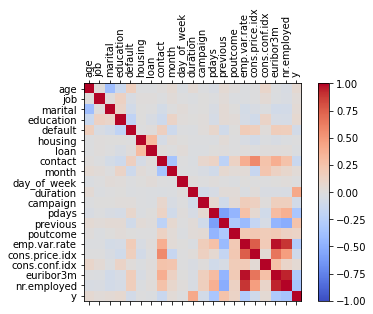

In [ ]:
# Now we can make a pretty correlation heatmap with pyplot
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(corr,cmap='coolwarm', vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,len(corr.columns),1)
ax.set_xticks(ticks)
plt.xticks(rotation=90)
ax.set_yticks(ticks)
ax.set_xticklabels(corr.columns)
ax.set_yticklabels(corr.columns)
plt.show()

In [ ]:
corr_euevr = df['cons.price.idx'].corr(df['emp.var.rate'])
corr_euevr

0.7551545556791889

In [ ]:
corr_euevr = df['nr.employed'].corr(df['emp.var.rate'])
corr_euevr

0.8971732161536626

In [ ]:
corr_eunr = df['euribor3m'].corr(df['emp.var.rate'])
corr_eunr

0.9703079598849331

In [ ]:
corr_eunr = df['euribor3m'].corr(df['nr.employed'])
corr_eunr

0.9425892832458506

In [ ]:
corr_eunr = df['nr.employed'].corr(df['cons.price.idx'])
corr_eunr

0.4725597632436418

In [ ]:
corr_eunr = df['euribor3m'].corr(df['cons.price.idx'])
corr_eunr

0.6571593688351582

#### Question 1

I decided to pick the variables with the heat map code from up above, after I recoded the categorical variables for analysis. The first thing I ran was just the corr() function which is helpful, however it is easier to see the relationships with color. So I saw with the heat map, the more red it got the stronger the relationship. After that I looked for which column had the most and darkest reds, meaning multiple relationships. The variable that had the most and darkest reds was emp.var.rate, which means employment variation rate. This had three very strong relationships with euribor3m, cons.price.idx, and nr.employed. And to prove that this was the case I ran their correlations individually which proves that the heat map is accurate. 

## Question 2

My analysis shows that the strongest connection is between euribor3m and emp.var.rate, and nr.employed, while emp.var.rate and euribor3m both had the strongest relationship in comparison to all 3 variables. This variables are  social and economic context attributes, as shown in the description, and are clearly the strongest correlated category of attribute. I am suprised age has hardly any positive or negative relationship along with education when dealing with banking info it seems like those would have correlated to possibly more knowledge. 

## Question 3

With very strong correlations, it would be possible to predict values in the future with more data, however if this were to be used it would be expected to include that this was predicted in the publication. 

In [7]:
import pandas as pd

#Changing the current working directory

numerical_col_updated = ['emp.var.rate','nr.employed','euribor3m']
df1 = pd.get_dummies(df1, columns = numerical_col_updated) 

#Separating the dependent and independent data variables into two data frames.
from sklearn.model_selection import train_test_split 

X = df1.drop(['y'],axis=1) 
Y = df1['y']

# Splitting the dataset into 80% training data and 20% testing data.
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=.20, random_state=0)



KeyError: ignored

In [9]:
#Building the Decision Tree Model on our dataset
from sklearn.tree import DecisionTreeRegressor
for index, line in enumerate(open('https://raw.githubusercontent.com/lwallac2/Bank-Marketing/main/bank-additional-names.txt', 'r').readlines()):
    w = line.split(' ')
    l1 = w[1:8]
    l2 = w[8:15]

    try:
        list1 = map(int, l1)
        list2 = map(int, l2)
    except ValueError:
        print 
        'Line_{i}_is_corrupt!'.format(i = index)
        break
DT_model = DecisionTreeRegressor(max_depth=200).fit(X_train,Y_train)
DT_predict = DT_model.predict(X_test) 
#Predictions on Testing data
print(DT_predict)

FileNotFoundError: ignored

Essentially this code would produce a decision tree which is a predictor, and is suppossed to be reading the data in order to know what to put in the tree. However, it is getting caught up on one input value for job, and I'm not sure how to fix it. But this idea is how you can predict future values. 